In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pyperclip

# Real Data

In [2]:
def load_real_data():
    # Load the datasets
    dataset_locations = [f'data/stock_data_complete/{dataset_path}' for dataset_path in os.listdir(f'data/stock_data_complete')]
    datasets = [pd.read_csv(dataset_location)[['Date', 'Time', 'Close']] for dataset_location in dataset_locations] # Load datasets
    datasets = [df.rename(columns={'Close': dataset_name.split('.')[0]}) for (df, dataset_name) in zip(datasets, os.listdir('data/stock_data_complete'))]

    # Join datasets
    dataset = datasets[0].set_index(['Date', 'Time'])
    for df_other in datasets[1:]:
        dataset = dataset.join(df_other.set_index(['Date', 'Time']))
    dataset = dataset.dropna()
    dataset = dataset.reset_index()
    print(dataset.index)

    return dataset

In [3]:
def filter_dates(dataset, start_date, end_date):
    # Get the right dates
    dataset['Date'] = pd.to_datetime(dataset['Date'])
    dataset = dataset.loc[dataset['Date'].between(start_date, end_date)]

    # Drop Date and Time columns
    dataset = dataset.drop(['Date', 'Time'], axis=1)

    return dataset

In [4]:
def get_real_data_stats(dataset):
    statistics = pd.DataFrame()
    statistics.index = dataset.columns
    statistics['mean'] = [dataset[key].mean() for key in dataset.keys()]
    statistics['median'] = [dataset[key].median() for key in dataset.keys()]
    statistics['range'] = [dataset[key].max() - dataset[key].min() for key in dataset.keys()]
    statistics['std_dev'] = [dataset[key].std() for key in dataset.keys()]
    statistics['variance'] = [dataset[key].var() for key in dataset.keys()]
    statistics['kurtosis'] = [dataset[key].kurt() for key in dataset.keys()]
    statistics['skewness'] = [dataset[key].skew() for key in dataset.keys()]

    return statistics

In [5]:
def get_correlations(dataset):
    correlations = np.empty((dataset.shape[1], dataset.shape[1]))
    for i in range(dataset.shape[1]):
        for j in range(dataset.shape[1]):
            corr, _ = pearsonr(dataset[dataset.columns[i]], dataset[dataset.columns[j]])
            correlations[i, j] = corr
    return correlations

In [47]:
def create_real_data_heatmap(df, correlations, size, save, fig_name):
    fig, ax = plt.subplots(figsize=size)
    plt.title('Pearson Correlation of Stocks')
    sns.heatmap(correlations, xticklabels=df.columns, yticklabels=df.columns, cmap='RdYlBu')
    if save:
        plt.savefig(f'results/{fig_name}.png')
    plt.show()

In [82]:
dataset = load_real_data()
dataset.head()

RangeIndex(start=0, stop=860735, step=1)


,Date,Time,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
0,03/19/2008,1014,17.20,37.56,59.09,58.07,21.26,61.12,32.99,28.01,...,13.67,14.51,51.90,38.29,32.57,56.30,14.46,22.10,41.43,68.58
1,03/19/2008,1015,17.18,37.59,59.07,58.12,21.29,61.13,32.92,28.02,...,13.68,14.52,51.92,38.29,32.52,56.32,13.98,22.10,41.50,68.61
2,03/19/2008,1016,17.17,37.47,59.05,58.04,21.24,61.20,32.86,27.99,...,13.66,14.52,51.90,38.25,32.51,56.30,13.88,22.06,41.45,68.63
3,03/19/2008,1017,17.15,37.53,59.10,58.19,21.27,61.20,32.88,28.00,...,13.68,14.50,51.86,38.19,32.47,56.32,13.83,22.06,41.41,68.66
4,03/19/2008,1018,17.14,37.44,59.09,58.19,21.24,61.18,32.94,28.00,...,13.70,14.50,51.84,38.15,32.44,56.33,13.76,22.07,41.42,68.63


# Real data (full)

In [83]:
# Filter dataset on all dates
start_date, end_date = '03/19/2008', '02/17/2017'
full_dataset = filter_dates(dataset, start_date, end_date)

In [116]:
# Get main dataset stats
stats_full = get_real_data_stats(full_dataset).round(2)
pyperclip.copy(stats_full.to_latex())
stats_full

C:\Users\User\AppData\Local\Temp\ipykernel_18852\1014796708.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pyperclip.copy(stats_full.to_latex())


,mean,median,range,std_dev,variance,kurtosis,skewness
AAPL,64.11,61.32,126.09,34.69,1203.64,-1.22,0.16
AXP,54.35,53.49,83.49,20.73,429.69,-0.98,-0.04
BA,84.47,66.16,149.67,37.32,1392.67,-1.32,0.34
CAT,69.83,74.49,84.18,19.45,378.23,-0.12,-0.78
CSCO,20.52,19.98,22.61,4.88,23.85,-0.70,0.42
CVX,83.39,86.22,79.57,19.87,394.66,-1.16,-0.26
DD,44.61,42.38,66.61,15.73,247.28,-1.01,0.06
DIS,56.77,46.06,105.83,30.55,933.27,-1.29,0.46
GE,19.67,19.78,27.89,6.34,40.14,-1.01,0.11
GS,145.68,150.47,209.22,34.96,1222.00,0.27,-0.06


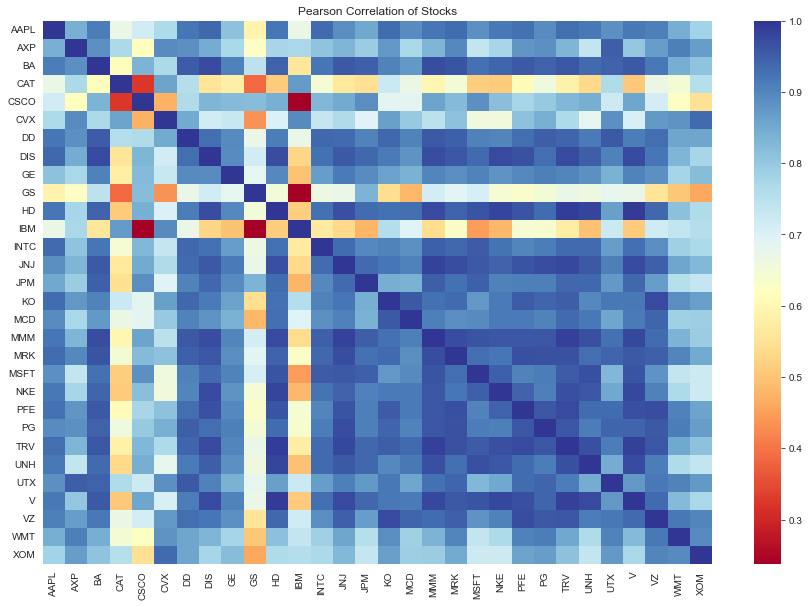

In [118]:
# Get heatmap correlations
#correlations_full = get_correlations(full_dataset)
pyperclip.copy(str(correlations_full))
create_real_data_heatmap(full_dataset, correlations_full, size=(15,10), save=True, fig_name='real_data_full_heatmap')

# Real Data (2016/17)

In [86]:
# Filter dataset on all dates
start_date, end_date = '01/01/2016', '02/17/2017'
half_dataset = filter_dates(dataset, start_date, end_date)

In [117]:
# Get main dataset stats
stats_half = get_real_data_stats(half_dataset).round(2)
pyperclip.copy(stats_half.to_latex())
stats_half

C:\Users\User\AppData\Local\Temp\ipykernel_18852\2199672217.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pyperclip.copy(stats_half.to_latex())


,mean,median,range,std_dev,variance,kurtosis,skewness
AAPL,105.45,105.42,48.01,10.30,106.12,-0.03,0.60
AXP,64.60,63.73,30.75,6.82,46.49,-0.35,0.37
BA,133.51,129.54,74.37,14.39,207.02,-0.08,0.81
CAT,78.81,78.90,45.01,11.15,124.36,-0.87,-0.06
CSCO,28.47,29.40,12.27,2.54,6.47,0.00,-0.84
CVX,98.70,99.00,46.38,10.62,112.71,-0.38,-0.25
DD,66.20,66.64,29.02,5.85,34.17,0.16,-0.35
DIS,97.81,96.86,26.74,5.38,28.89,-0.08,0.81
GE,29.89,29.92,6.21,1.21,1.47,-0.33,-0.32
GS,175.82,161.86,114.92,33.13,1097.65,-0.21,1.17


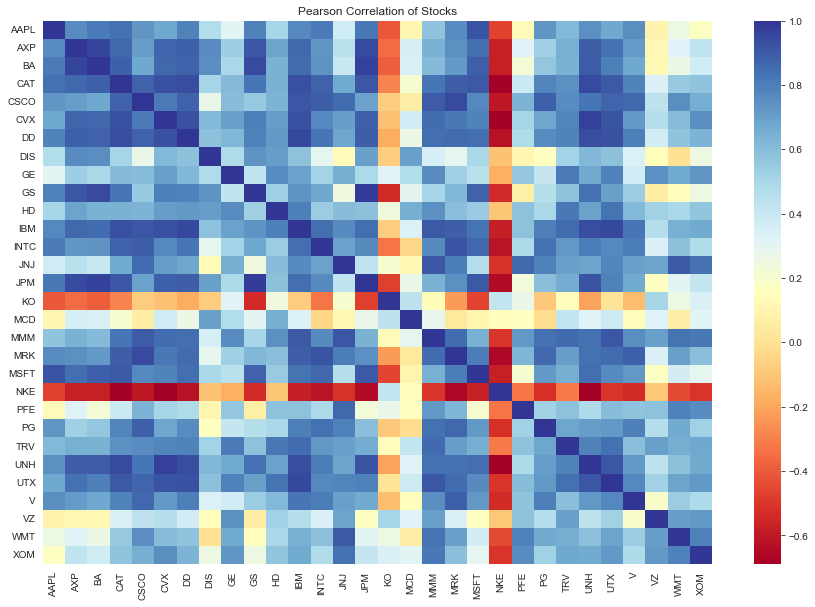

In [119]:
# Get heatmap correlations
#correlations_half = get_correlations(half_dataset)
pyperclip.copy(str(correlations_half))
create_real_data_heatmap(half_dataset, correlations_half, size=(15,10), save=True, fig_name='real_data_16_heatmap')

(array([ 46.,  48.,  54.,  64., 118., 132., 150., 126.,  56.,  42.,  14.,
         18.,   8.,  10.,   6.,   0.,   2.,   0.,   0.,   0.,   0.,   2.,
          0.,   0.,   2.,   0.,   0.,   0.,   0.,   2.]),
 array([0.00579107, 0.13344482, 0.26109857, 0.38875231, 0.51640606,
        0.64405981, 0.77171356, 0.89936731, 1.02702106, 1.15467481,
        1.28232856, 1.4099823 , 1.53763605, 1.6652898 , 1.79294355,
        1.9205973 , 2.04825105, 2.1759048 , 2.30355855, 2.4312123 ,
        2.55886604, 2.68651979, 2.81417354, 2.94182729, 3.06948104,
        3.19713479, 3.32478854, 3.45244229, 3.58009603, 3.70774978,
        3.83540353]),
 <BarContainer object of 30 artists>)

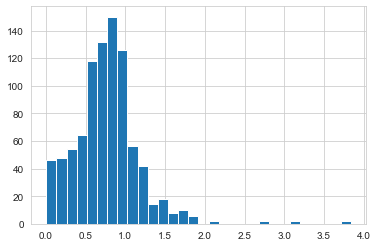

In [136]:
change = (abs(correlations_half) / abs(correlations_full)).ravel()
plt.hist(change, bins=30, label='hst')

In [137]:
# DOES THE GRAPH ABOVE MEAN THAT THE STOCK CONNECTIONS ARE MORE OR LESS THE SAME??